In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-24 08:09:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-24 08:09:42 (68.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



# Let's get some Data

This time we're going to see how we can use the pretrained models within `tf.keras.applications` and apply them to our problem(classifying image of food)

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-07-24 08:09:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   153MB/s    in 1.0s    

2024-07-24 08:09:44 (153 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# importing functions from helper_functions

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
# Unzip_data
unzip_data("10_food_classes_10_percent.zip")

In [5]:
## Let's walk through the data

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

## Preprocessing the data

In [6]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [8]:
IMG_SIZE = (224,224)
train_data_10_percent = image_dataset_from_directory(directory = train_dir,
                                                     image_size = IMG_SIZE,
                                                     label_mode = "categorical")

test_data = image_dataset_from_directory(directory = test_dir,
                                         image_size = IMG_SIZE,
                                         label_mode = "categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
# checking the batch data example

for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[ 16.357143   27.357141   48.530613 ]
   [ 11.311223   22.311224   40.45408  ]
   [  9.         21.         35.       ]
   ...
   [ 20.423498   31.99497    56.637764 ]
   [ 11.999987   25.025501   41.877514 ]
   [ 10.586687   24.586687   36.872334 ]]

  [[ 21.566326   28.90306    49.040817 ]
   [ 15.280611   24.07653    41.36224  ]
   [ 11.714286   20.515306   35.117348 ]
   ...
   [ 13.698936   23.499977   50.78565  ]
   [  7.066325   20.066326   38.91834  ]
   [  8.331665   21.357178   37.87755  ]]

  [[ 12.857143   17.42857    36.709183 ]
   [ 13.413265   17.984694   36.586735 ]
   [ 19.47449    24.831633   40.709183 ]
   ...
   [  5.765272   15.596922   42.93362  ]
   [ 12.05612    22.112253   46.943855 ]
   [ 10.923497   22.852102   44.423428 ]]

  ...

  [[ 18.331541   15.331541    9.903013 ]
   [ 27.632627   24.632627   19.632627 ]
   [ 23.402946   19.402946   16.402946 ]
   ...
   [ 22.357208   20.357208   21.357208 ]
   [ 18.54583    16.54583    17.54583  ]
   [ 

## Create a Base-Model using Functional api

In [10]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3))

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name= "global_average_pooling_layer")(x)

output = tf.keras.layers.Dense(10, activation = "softmax")(x)

model_0 = tf.keras.Model(inputs,output)

model_0.compile(loss = "categorical_crossentropy",
                optimizer  = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_model_0 = model_0.fit(train_data_10_percent,
                              epochs =5,
                              steps_per_epoch = len(train_data_10_percent),
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              callbacks=[create_tensorboard_callback(dir_name = "transfer_learning",
                                                                     experiment_name = "model_0")])

16705208/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/model_0/20240724-081008
Epoch 1/5
24/24 [==============================] - 39s 693ms/step - loss: 1.8472 - accuracy: 0.4387 - val_loss: 1.2873 - val_accuracy: 0.7424
Epoch 2/5
24/24 [==============================] - 11s 445ms/step - loss: 1.0685 - accuracy: 0.7827 - val_loss: 0.8573 - val_accuracy: 0.8252
Epoch 3/5
24/24 [==============================] - 13s 506ms/step - loss: 0.7778 - accuracy: 0.8307 - val_loss: 0.6911 - val_accuracy: 0.8424
Epoch 4/5
24/24 [==============================] - 10s 385ms/step - loss: 0.6163 - accuracy: 0.8707 - val_loss: 0.6056 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 13s 532ms/step - loss: 0.5354 - accuracy: 0.8760 - val_loss: 0.5546 - val_accuracy: 0.8628


In [11]:
# evaluate on the full data
model_0.evaluate(test_data)


79/79 [==============================] - 8s 94ms/step - loss: 0.5546 - accuracy: 0.8628


[0.5545588135719299, 0.8628000020980835]

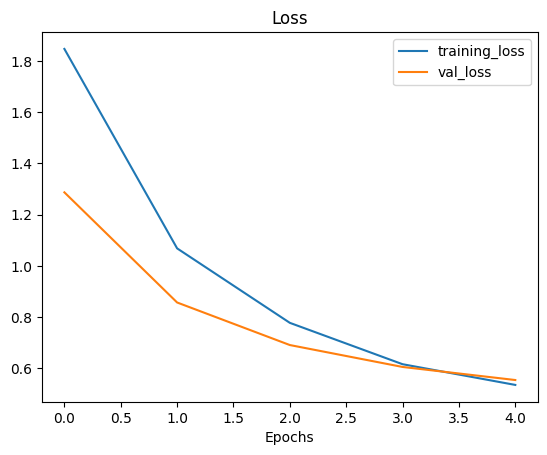

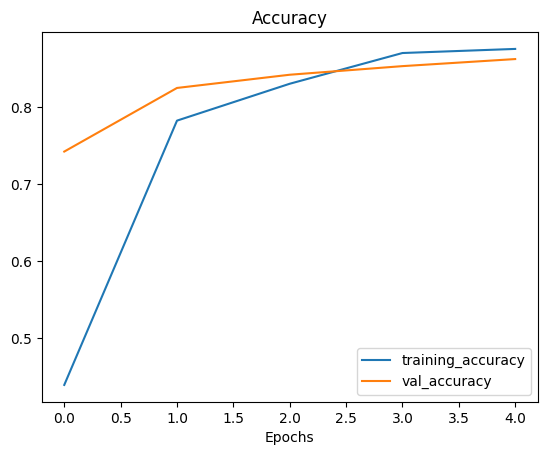

In [12]:
plot_loss_curves(history_model_0)

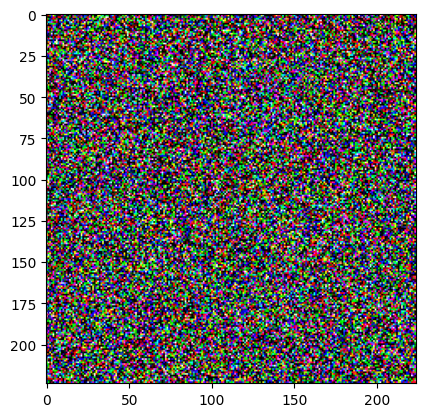

In [13]:
img = tf.random.normal(shape = (224,224,3))
# img = tf.expand_dims(img,axis = 0)
import matplotlib.pyplot as plt
plt.imshow(img);

## Doing experiments with different combination of models and data


### Getting data and Preprocessing for model_1

In [14]:
## downloading and unzipping the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2024-07-24 08:12:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   175MB/s    in 0.7s    

2024-07-24 08:12:14 (175 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [15]:
train_dir = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [16]:
walk_through_dir(train_dir)

There are 10 directories and 0 images in '10_food_classes_1_percent/train/'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.


In [17]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode = "categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical")


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [18]:
# Data augmentation

import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomHeight(0.2),
    layers.experimental.preprocessing.RandomWidth(0.2)
])

## Visualizing the data of data augmentation

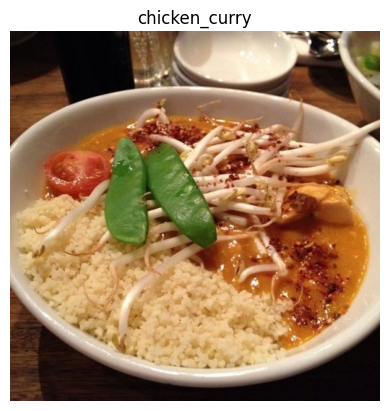

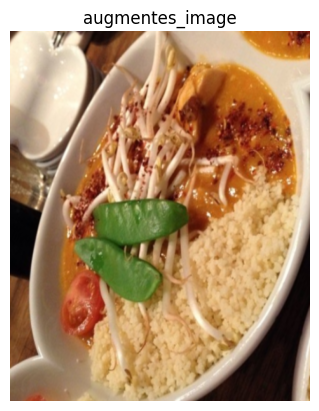

In [25]:
import random
import os
import matplotlib.pyplot as plt

target_class = random.choice(train_data_1_percent.class_names)

target_dir = train_dir + target_class

random_image = random.choice(os.listdir(target_dir))
img = plt.imread(target_dir + "/" + random_image)
plt.imshow(img)
plt.title(target_class)
plt.axis(False)

aug_img = data_augmentation(tf.expand_dims(img,axis = 0 ))
plt.figure()

plt.imshow(tf.squeeze(aug_img)/255.)
plt.axis(False)
plt.title("augmentes_image");

### Let's build the model_1

In [28]:
## giving input_shape and augmented data
input_shape = (224,224,3)

# creating the base model and unfreezing the top layer
base_model = tf.keras.applications.EfficientNetB0(include_top  = False)

# Retrieving the weights learned
base_model.trainable = False

# Creating input layer

inputs = tf.keras.layers.Input(input_shape)

# passing data through data_augmentation layer before the base_model

x = data_augmentation(inputs)

# passing through the base model

x = base_model(x,training = False)

# pooling the features from input layer

x = tf.keras.layers.GlobalAveragePooling2D()(x)

#creating the output layer

outputs = tf.keras.layers.Dense(10, activation = "softmax")(x)

model_1 = tf.keras.Model(inputs , outputs)

# compile the model

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model

history_model_1 = model_1.fit(train_data_1_percent,
                              epochs = 5,
                              steps_per_epoch = len(train_data_1_percent),
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                       experiment_name = "model_1")])


Saving TensorBoard log files to: transfer_learning/model_1/20240724-084632
Epoch 1/5
3/3 [==============================] - 20s 5s/step - loss: 2.3634 - accuracy: 0.0857 - val_loss: 2.2128 - val_accuracy: 0.1996
Epoch 2/5
3/3 [==============================] - 13s 6s/step - loss: 2.1107 - accuracy: 0.2000 - val_loss: 2.0770 - val_accuracy: 0.2916
Epoch 3/5
3/3 [==============================] - 8s 3s/step - loss: 1.9142 - accuracy: 0.4857 - val_loss: 1.9563 - val_accuracy: 0.3900
Epoch 4/5
3/3 [==============================] - 8s 3s/step - loss: 1.7116 - accuracy: 0.5857 - val_loss: 1.8517 - val_accuracy: 0.4668
Epoch 5/5
3/3 [==============================] - 8s 3s/step - loss: 1.5412 - accuracy: 0.7429 - val_loss: 1.7589 - val_accuracy: 0.5184


### Building the model_2 using the data of 10% and model_same as model_1

In [ ]:
## creating modelcheckpoint callback

checkpoint_path = "transfer_learning/checkpoint"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq ="epoch")

In [42]:
#giving input shape and unfreezing the top-layer

input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

# creating the input layer

inputs = tf.keras.layers.Input(input_shape)

# passing the input data to data augmentation before to base_model

x = data_augmentation(inputs)

# passing the augmented data to base model

x = base_model(x)

# pooling the input features

x = tf.keras.layers.GlobalAveragePooling2D()(x)

# output_layer

outputs = tf.keras.layers.Dense(10 , activation = "softmax")(x)

model_2 = tf.keras.Model(inputs, outputs)

# compile the model

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model_2

history_model_2 = model_2.fit(train_data_10_percent,
                              epochs = 5,
                              steps_per_epoch = len(train_data_10_percent),
                              validation_data = test_data,
                              validation_steps = 0.25* len(test_data),
                              callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                       experiment_name = "model_2"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_2/20240724-095640
Epoch 1/5
24/24 [==============================] - 16s 342ms/step - loss: 2.0082 - accuracy: 0.3293 - val_loss: 1.4787 - val_accuracy: 0.6516
Epoch 2/5
24/24 [==============================] - 7s 264ms/step - loss: 1.3701 - accuracy: 0.6707 - val_loss: 1.0599 - val_accuracy: 0.7531
Epoch 3/5
24/24 [==============================] - 7s 263ms/step - loss: 1.0455 - accuracy: 0.7320 - val_loss: 0.8327 - val_accuracy: 0.8125
Epoch 4/5
24/24 [==============================] - 6s 215ms/step - loss: 0.8663 - accuracy: 0.7907 - val_loss: 0.7336 - val_accuracy: 0.8203
Epoch 5/5
24/24 [==============================] - 7s 263ms/step - loss: 0.7881 - accuracy: 0.8093 - val_loss: 0.6524 - val_accuracy: 0.8297


In [43]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 66ms/step - loss: 0.6322 - accuracy: 0.8408


[0.6322349309921265, 0.8407999873161316]

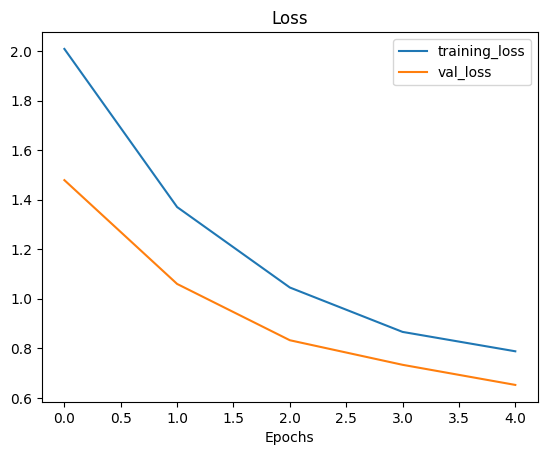

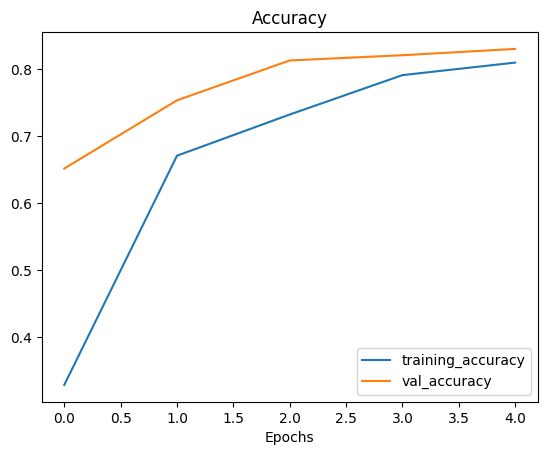

In [44]:
plot_loss_curves(history_model_2)

### loading and comparing the saved weights

In [45]:
model_2.load_weights(checkpoint_path)

In [47]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 0.6322 - accuracy: 0.8408


[0.6322349905967712, 0.8407999873161316]

## Model_3 is Fine-Tuning of model_2

In [ ]:
for i , layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name)

In [ ]:
##  only keeping top_10 layers trainable
base_model.trainable = True

base_model.trainable = layer.trainable =False for layer in model_2.layers[2].layers[:-10]

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])
